In [95]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics
#importing the train set
df=pd.read_csv('train_jqd04QH.csv - train_jqd04QH.csv.csv')
#here x is the input set and y is the output set
x=df.drop(columns=['target'])
y=df['target']
#printing the input set to verify
x



,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71
18355,25545,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160
18356,11514,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18
18357,1689,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,3,41


In [96]:
#printing the y set to verify
y

0        0
1        0
2        0
3        0
4        1
        ..
18354    0
18355    0
18356    0
18357    0
18358    0
Name: target, Length: 18359, dtype: int64

In [97]:
#checking the number of rows and columns in the given data set
pd.get_dummies(df).shape

(18359, 188)

In [98]:
#converting string into numeric of city column using  frequency encoding method
#first we make a dictonary that maps each label to the count
city_=x.city.value_counts().to_dict()
#and now we replace city labels in the input data set x
x.city=x.city.map(city_)


In [99]:
#converting string into numeric of gender column using data frequency encoding  method
gender_=x.gender.value_counts().to_dict()
x.gender=x.gender.map(gender_)


In [100]:
#converting string into numeric of relevent_experience column using  frequency encoding method
relevent_experience_=x.relevent_experience.value_counts().to_dict()
x.relevent_experience=x.relevent_experience.map(relevent_experience_)

In [101]:
#converting string into numeric of  enrolled_university column using  frequency encoding method
enrolled_university_=x.enrolled_university.value_counts().to_dict()
x.enrolled_university=x.enrolled_university.map(enrolled_university_)

In [102]:
#converting string into numeric of  education_level column using  frequency encoding method
education_level_=x.education_level.value_counts().to_dict()
x.education_level=x.education_level.map(education_level_)

In [103]:
#converting string into numeric of major_disciplin  column using  frequency encoding  method
major_discipline_=x.major_discipline.value_counts().to_dict()
x.major_discipline=x.major_discipline.map(major_discipline_)

In [104]:
#converting string into numeric of company_type column using  frequency encoding method
company_type_=x.company_type.value_counts().to_dict()
x.company_type=x.company_type.map(company_type_)

In [105]:
#converting string into numeric of company_size column using  frequency encoding method
company_size_=x.company_size.value_counts().to_dict()
x.company_size=x.company_type.map(company_size_)


In [106]:
#converting string into numeric of experience column using  frequency encoding  method
experience_=x.experience.value_counts().to_dict()
x.experience=x.experience.map(experience_)


In [107]:
#converting string into numeric of ast_new_job column using  frequency encoding method
last_new_job_=x.last_new_job.value_counts().to_dict()
x.last_new_job=x.last_new_job.map(last_new_job_)
x

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,23798,105,0.689,12884.0,13596,13659.0,10769.0,13738.0,1159.0,NaN,10051.0,7567.0,106
1,29166,142,0.923,12884.0,13596,13659.0,10769.0,13738.0,602.0,NaN,1038.0,7567.0,69
2,46,1654,0.910,NaN,13596,13659.0,10769.0,13738.0,1125.0,NaN,996.0,2835.0,4
3,18527,119,0.666,12884.0,13596,13659.0,10769.0,13738.0,602.0,NaN,10051.0,7567.0,26
4,21751,271,0.887,NaN,4763,13659.0,4319.0,13738.0,755.0,NaN,NaN,2835.0,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,4358,0.920,12884.0,13596,3187.0,10769.0,13738.0,1309.0,NaN,10051.0,7567.0,71
18355,25545,827,0.920,12884.0,4763,13659.0,10769.0,688.0,695.0,NaN,10051.0,7567.0,160
18356,11514,1472,0.926,12884.0,13596,13659.0,4319.0,13738.0,667.0,NaN,10051.0,1027.0,18
18357,1689,332,0.939,12884.0,13596,13659.0,10769.0,13738.0,3437.0,NaN,10051.0,1027.0,41


In [108]:
#filling the null with 0 value
x=x.fillna(0)
#training model by taking depth 2

x_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=DecisionTreeClassifier()

model.fit(x_train,y_train)

predictions=model.predict(X_test)
#calculating the accuracy of  model
score=accuracy_score(y_test,predictions)
print(" Decision Tree Classifier model Accuracy=",score*100,"%")

 Decision Tree Classifier model Accuracy= 77.17864923747277 %


In [109]:
#training model by taking depth 3
x_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

model2=DecisionTreeClassifier()

model2.fit(x_train,y_train)

predictions=model2.predict(X_test)
#calculating the accuracy of  model
score=accuracy_score(y_test,predictions)
print("Decision Tree Classifier model2 Accuracy=",score*100,"%")

Decision Tree Classifier model2 Accuracy= 76.3435003631082 %


In [110]:
#training model by taking depth 4
x_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

model3=DecisionTreeClassifier()

model3.fit(x_train,y_train)

predictions=model3.predict(X_test)
#calculating the accuracy of  model
score=accuracy_score(y_test,predictions)
print("Decision Tree Classifier model3 Accuracy=",score*100,"%")

Decision Tree Classifier model3 Accuracy= 77.09694989106754 %


In [111]:
# training the model on training set for Gaussian Naive Bayes Method
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 86.60130718954248


In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[6347,   20],
       [ 964,   13]], dtype=int64)

In [113]:
#implementing precision recall and f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      6367
           1       0.39      0.01      0.03       977

    accuracy                           0.87      7344
   macro avg       0.63      0.51      0.48      7344
weighted avg       0.81      0.87      0.81      7344



In [114]:
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False) 
feature_imp

enrollee_id               0.305107
training_hours            0.207181
experience                0.101152
city_development_index    0.092397
city                      0.071716
last_new_job              0.054389
company_type              0.036911
education_level           0.031877
gender                    0.030332
enrolled_university       0.028557
major_discipline          0.023791
relevent_experience       0.016591
company_size              0.000000
dtype: float64

No handles with labels found to put in legend.


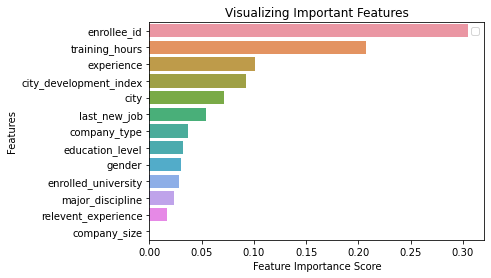

In [115]:
#To visualize the feature importance in decision tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [116]:
#importing the test set 
x_testset=pd.read_csv('test_KaymcHn (1).csv')
x_testset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15016,11308,city_46,0.762,NaN,Has relevent experience,no_enrollment,Masters,STEM,>20,500-999,Pvt Ltd,>4,68
15017,14612,city_21,0.624,Male,Has relevent experience,Full time course,Masters,STEM,4,1000-4999,Pvt Ltd,1,320
15018,33346,city_16,0.910,Male,Has relevent experience,no_enrollment,High School,NaN,9,1000-4999,Pvt Ltd,4,13
15019,14506,city_64,0.666,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,38


In [117]:
#converting string into numeric  using  frequency encoding or count  method.as we have done previously in training set
city_=x_testset.city.value_counts().to_dict()
x_testset.city=x_testset.city.map(city_)

gender_=x_testset.gender.value_counts().to_dict()
x_testset.gender=x_testset.gender.map(gender_)

relevent_experience_=x_testset.relevent_experience.value_counts().to_dict()
x_testset.relevent_experience=x_testset.relevent_experience.map(relevent_experience_)

enrolled_university_=x_testset.enrolled_university.value_counts().to_dict()
x_testset.enrolled_university=x_testset.enrolled_university.map(enrolled_university_)

education_level_=x_testset.education_level.value_counts().to_dict()
x_testset.education_level=x_testset.education_level.map(education_level_)

major_discipline_=x_testset.major_discipline.value_counts().to_dict()
x_testset.major_discipline=x_testset.major_discipline.map(major_discipline_)

company_type_=x_testset.company_type.value_counts().to_dict()
x_testset.company_type=x_testset.company_type.map(company_type_)

company_size_=x_testset.company_size.value_counts().to_dict()
x_testset.company_size=x_testset.company_type.map(company_size_)

experience_=x_testset.experience.value_counts().to_dict()
x_testset.experience=x_testset.experience.map(experience_)

last_new_job_=x_testset.last_new_job.value_counts().to_dict()
x_testset.last_new_job=x_testset.last_new_job.map(last_new_job_)
x_testset=x_testset.fillna(0)
x_testset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,6,0.448,0.0,3919,2565.0,8743.0,11117.0,366.0,0.0,796.0,0.0,15
1,12036,175,0.939,10578.0,3919,11228.0,8743.0,11117.0,2713.0,0.0,8063.0,6246.0,94
2,11061,3494,0.920,10578.0,3919,2565.0,8743.0,11117.0,1007.0,0.0,0.0,6246.0,17
3,5032,237,0.924,10578.0,3919,11228.0,422.0,11117.0,2713.0,0.0,8063.0,2298.0,76
4,17599,23,0.830,10578.0,11102,11228.0,8743.0,11117.0,914.0,0.0,8063.0,2298.0,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15016,11308,103,0.762,0.0,11102,11228.0,3478.0,11117.0,2713.0,0.0,8063.0,2684.0,68
15017,14612,1350,0.624,10578.0,11102,2565.0,3478.0,11117.0,990.0,0.0,8063.0,6246.0,320
15018,33346,1274,0.910,10578.0,11102,11228.0,1676.0,0.0,743.0,0.0,8063.0,837.0,13
15019,14506,115,0.666,0.0,3919,2565.0,8743.0,11117.0,1091.0,0.0,0.0,6246.0,38


In [118]:
#gbn is the Gaussian Naive Bayes  model which has given high accuracy
#using gbn model we are predicting the test set output  
final_prediction=gnb.predict(x_testset)
final_prediction

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
#converting array into dataframe
df2=pd.DataFrame(final_prediction)
df2

,0
0,1
1,0
2,0
3,0
4,0
...,...
15016,0
15017,0
15018,0
15019,0


In [120]:
#selecting the enrollee_id from the input data set
select=x_testset['enrollee_id']
#merging the enrollee_id column and df2 then making a new data frame.
prediction_data_set=pd.concat([select,df2],axis=1)
prediction_data_set

,enrollee_id,0
0,16548,1
1,12036,0
2,11061,0
3,5032,0
4,17599,0
...,...,...
15016,11308,0
15017,14612,0
15018,33346,0
15019,14506,0


In [121]:
#providing column names for the data set
prediction_data_set.columns={'enrollee_id','target'}
prediction_data_set



,enrollee_id,target
0,16548,1
1,12036,0
2,11061,0
3,5032,0
4,17599,0
...,...,...
15016,11308,0
15017,14612,0
15018,33346,0
15019,14506,0


In [122]:
#converting the preciction data set into csv file
prediction_data_set.to_csv('sample_submission_1.csv',index=False)


